In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:

# Load the saved model
loaded_model_aug = tf.keras.models.load_model('model_aug_saved.h5')


In [4]:
#loaded_model_net = tf.keras.models.load_model('model_net_saved.h5')

ValueError: The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(3, 3, 32, 1), Received: value.shape=(3, 3, 3, 32). Target variable: <KerasVariable shape=(3, 3, 32, 1), dtype=float32, path=expanded_conv_depthwise/kernel>

In [7]:


# Load the trained model
loaded_model_aug = tf.keras.models.load_model('model_aug_saved.h5')

# Function to preprocess a single image
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Example: preprocess a new image
image_path = 'hiya.png'
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = loaded_model_aug.predict(preprocessed_image)

# # Extract class and bounding box predictions
# class_prediction = np.argmax(predictions[0], axis=-1)  # Class prediction
# bbox_prediction = predictions[1]  # Bounding box prediction

# # Map class index to class label
# class_idx_to_label = {idx: label for label, idx in label_map.items()}
# predicted_class_label = class_idx_to_label[class_prediction[0]]

# # Get the bounding box
# xmin, ymin, xmax, ymax = bbox_prediction[0]

# # Display the image with the predicted bounding box and class label
# # Load and preprocess the image for display
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.resize(image, (224, 224))

# # Draw the bounding box
# start_point = (int(xmin), int(ymin))
# end_point = (int(xmax), int(ymax))
# color = (255, 0, 0)  # Red color for the bounding box
# thickness = 2  # Thickness of the bounding box
# image = cv2.rectangle(image, start_point, end_point, color, thickness)

# # Put the class label text on the image
# font = cv2.FONT_HERSHEY_SIMPLEX
# org = (10, 30)  # Position for the class label text
# font_scale = 1
# color = (0, 255, 0)  # Green color for the text
# thickness = 2  # Thickness of the text
# image = cv2.putText(image, predicted_class_label, org, font, font_scale, color, thickness, cv2.LINE_AA)

# # Display the image
# plt.imshow(image)
# plt.title(f"Predicted Class: {predicted_class_label}")
# plt.axis('off')
# plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [8]:
predictions

[array([[1.4245244e-02, 9.5296991e-01, 2.2142917e-02, 6.8322248e-03,
         3.6813301e-04, 1.3508938e-03, 2.0907761e-03]], dtype=float32),
 array([[171.07083, 181.60919, 216.2251 , 233.43251]], dtype=float32)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


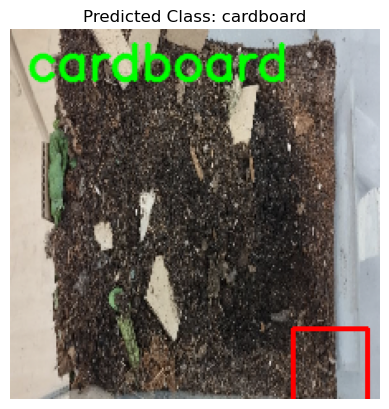

Predicted Class: cardboard
Bounding Box Coordinates: (171.07083, 181.60919, 216.2251, 233.43251)


In [11]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the label map
def create_label_map():
    train_classes = pd.read_csv('Composed Worm AI.v1i.tensorflow/train/_annotations.csv')['class']
    verif_classes = pd.read_csv('Composed Worm AI.v1i.tensorflow/valid/_annotations.csv')['class']
    test_classes = pd.read_csv('Composed Worm AI.v1i.tensorflow/test/_annotations.csv')['class']

    unique_classes = pd.concat([train_classes, verif_classes, test_classes]).unique()
    label_map = {label: idx for idx, label in enumerate(unique_classes)}
    return label_map

# Function to preprocess a single image
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Prediction function
def predict_image(image_path, model, label_map):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(preprocessed_image)

    # Extract class and bounding box predictions
    class_prediction = np.argmax(predictions[0], axis=-1)  # Class prediction
    bbox_prediction = predictions[1]  # Bounding box prediction

    # Map class index to class label
    class_idx_to_label = {idx: label for label, idx in label_map.items()}
    predicted_class_label = class_idx_to_label[class_prediction[0]]

    # Get the bounding box
    xmin, ymin, xmax, ymax = bbox_prediction[0]

    # Load and preprocess the image for display
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # Draw the bounding box
    start_point = (int(xmin), int(ymin))
    end_point = (int(xmax), int(ymax))
    color = (255, 0, 0)  # Red color for the bounding box
    thickness = 2  # Thickness of the bounding box
    image = cv2.rectangle(image, start_point, end_point, color, thickness)

    # Put the class label text on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (10, 30)  # Position for the class label text
    font_scale = 1
    color = (0, 255, 0)  # Green color for the text
    thickness = 2  # Thickness of the text
    image = cv2.putText(image, predicted_class_label, org, font, font_scale, color, thickness, cv2.LINE_AA)

    # Display the image
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_class_label}")
    plt.axis('off')
    plt.show()

    return predicted_class_label, (xmin, ymin, xmax, ymax)

# Load the trained model
model = tf.keras.models.load_model('model_aug_saved.h5')

# Create the label map
label_map = create_label_map()

# Example: predict a new image
image_path = 'hiya.png'
predicted_class_label, bbox_coordinates = predict_image(image_path, model, label_map)
print(f"Predicted Class: {predicted_class_label}")
print(f"Bounding Box Coordinates: {bbox_coordinates}")


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to preprocess a single image
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Prediction function
def predict_image_2(image_path, model):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(preprocessed_image)

    # Extract class and bounding box predictions
    class_prediction = np.argmax(predictions[0], axis=-1)  # Class prediction
    bbox_prediction = predictions[1]  # Bounding box prediction

    # Get the bounding box
    xmin, ymin, xmax, ymax = bbox_prediction[0]

    # Display the image with the predicted bounding box and class label
    # Load and preprocess the image for display
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # Draw the bounding box
    start_point = (int(xmin), int(ymin))
    end_point = (int(xmax), int(ymax))
    color = (255, 0, 0)  # Red color for the bounding box
    thickness = 2  # Thickness of the bounding box
    image = cv2.rectangle(image, start_point, end_point, color, thickness)

    # Put the class label text on the image (assuming you have access to the model's class names)
    class_names = model.output_names[0]  # Assuming class names are stored in the first output
    predicted_class_label = class_names[class_prediction[0]]

    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (10, 30)  # Position for the class label text
    font_scale = 1
    color = (0, 255, 0)  # Green color for the text
    thickness = 2  # Thickness of the text
    image = cv2.putText(image, predicted_class_label, org, font, font_scale, color, thickness, cv2.LINE_AA)

    # Display the image
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_class_label}")
    plt.axis('off')
    plt.show()

    return predicted_class_label, (xmin, ymin, xmax, ymax)

# Load the trained model
model = tf.keras.models.load_model('model_aug_saved.h5')

# Example: predict a new image
image_path = 'hiya.png'
predicted_class_label, bbox_coordinates = predict_image(image_path, model)
print(f"Predicted Class: {predicted_class_label}")
print(f"Bounding Box Coordinates: {bbox_coordinates}")


TypeError: predict_image() missing 1 required positional argument: 'label_map'